In [1]:
import pandas
import seaborn
import sklearn.decomposition

import numpy
numpy.set_printoptions(threshold=20)

import matplotlib
%matplotlib inline

# Instructions

- Read the data from CSV files and properly set the indices


In [2]:
data_train = pandas.read_csv('../data/swiss_roll.train.csv').set_index('id')
data_train

feature_1  feature_2  feature_3  label
id                                         
253  20.247690   3.510226 -10.899525      1
667   7.855569  14.636874  -0.812650      1
85   10.934220   9.997596   0.876846      1
969  12.332401   2.426448   7.210901      1
75    3.453681  -2.443097  -3.627336      0
..         ...        ...        ...    ...
835  -2.712459   9.219751  -6.060371      0
192   8.389786   1.642508   1.553796      1
629  15.253304   6.905200  -4.886124      1
559  20.891672  11.768400   1.729032      1
684   7.402823  -0.841563  -1.951443      0

[750 rows x 4 columns]

In [3]:
data_test = pandas.read_csv('../data/swiss_roll.test.csv').set_index('id')
data_test

feature_1  feature_2  feature_3  label
id                                         
993   1.981411  12.369014 -11.199469      0
859  -0.620656   7.692541   3.714898      0
298  14.535819  20.280348   2.769000      1
553  -1.204748   8.361636  -9.838214      0
672   1.279290  -0.175060 -11.983523      0
..         ...        ...        ...    ...
462   2.975667  12.322416   0.002500      1
356   3.031101   3.553869   5.881484      1
2     3.144801   3.231929 -13.694254      0
478   8.522862  18.170372   4.437525      1
695   6.718959  15.239360  -1.690276      1

[250 rows x 4 columns]

# Instructions

- Use the following code snippet to visualize both features and labels on both data sets

```
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data['feature_1'],
    data['feature_2'],
    data['feature_3'],
    c = data['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)
```


In [5]:
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data_train['feature_1'],
    data_train['feature_2'],
    data_train['feature_3'],
    c = data_train['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)

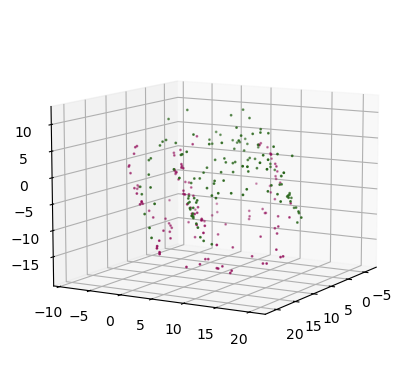

In [6]:
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data_test['feature_1'],
    data_test['feature_2'],
    data_test['feature_3'],
    c = data_test['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)

# Instructions
- Perform Principle Composition Analysis using `sklearn.decomposition.PCA` on both training and test dataset
- Create a `pandas.DataFrame` with columns `principal_feature_1`, `principal_feature_2`, and `label`
- Plot `seaborn.scatterplot` between `principal_feature_1` and `principal_feature_2`

In [7]:
pca = sklearn.decomposition.PCA(n_components=2)
pca

PCA(n_components=2)

In [8]:
pca.fit(data_train[['feature_1', 'feature_2', 'feature_3']])


PCA(n_components=2)

In [9]:
data_train_pca = pca.transform(data_train[['feature_1', 'feature_2', 'feature_3']])
data_train_pca

array([[  3.32038131,  14.03875104],
       [ -5.32239295,  -2.38527086],
       [ -5.82630822,   0.50728634],
       ...,
       [ -1.29925089,   6.89629488],
       [-10.90890727,   9.25654132],
       [  2.47947639,  -0.40690338]])

In [9]:
data_train_pca =pandas.DataFrame(
    data ={
        'principle_feature_1': data_train_pca[:,0],
        'principle_feature_2': data_train_pca[:,1],
        'label': data_train['label']
    }
    index = data
)

principal_feature_1  principal_feature_2  label
id                                                  
253             3.320381            14.038751      1
667            -5.322393            -2.385271      1
85             -5.826308             0.507286      1
969            -8.284894             0.631709      1
75              5.988518            -3.303550      0
..                   ...                  ...    ...
835             5.187149            -9.729460      0
192            -1.846366            -1.006783      1
629            -1.299251             6.896295      1
559           -10.908907             9.256541      1
684             2.479476            -0.406903      0

[750 rows x 3 columns]

In [13]:
data_test_pca =pandas.DataFrame(
    data ={
        'principle_feature_1': data_test_pca[:,0],
        'principle_feature_2': data_test_pca[:,1],
        'label': data_test['label']
    }
    index = data
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3539980798.py, line 2)

principal_feature_1  principal_feature_2  label
id                                                  
993             6.362479            -4.015454      0
859            -2.978411           -10.918748      0
298           -13.144219             1.878526      1
553             8.129202            -6.925383      0
672            12.692328            -2.771581      0
..                   ...                  ...    ...
462            -3.222958            -6.905689      1
356            -4.300633            -7.720471      1
2              11.953017            -0.893887      0
478           -11.426418            -4.014463      1
695            -4.446387            -3.222282      1

[250 rows x 3 columns]

In [12]:
seaborn.scatterplot(
    data = data_test_feature_selected,
    x = 'feature_2',
    y = 'feature_3',
    hue = 'label',
)

<Axes: xlabel='principal_feature_1', ylabel='principal_feature_2'>

In [12]:
seaborn.scatterplot(
    data = data_test_pca,
    x = 'principal_feature_1',
    y = 'principal_feature_2',
    hue = 'label',
)

NameError: name 'data_test_pca' is not defined

# Instructions

- Simply write the train data set to `./data/features.train.csv`
- Simply write the test data set to `./data/features.test.csv`
